<a href="https://colab.research.google.com/github/tsdes-santiago/projetos_bootcamp_DIO/blob/main/Confusion_Matrix_Metricas_avalia%C3%A7ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
DIO: Formação Machine Learning Specialist
Desafio : Cálculo de Métricas de Avaliação de Aprendizado
"""
"""
Cópia MNIST matrix confusão
"""

'\nCópia MNIST matrix confusão\n'

In [15]:
#!pip install -q tensorflow-gpu==2.0.0-beta1 # version not found

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0#-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0#-beta1


In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.15.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 0.1451 - accuracy: 0.9554 - val_loss: 0.0462 - val_accuracy: 0.9852
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0633 - val_accuracy: 0.9794
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0301 - val_accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0308 - val_accuracy: 0.9891


keras.src.engine.sequential.Sequential

In [17]:
y_true=test_labels
#y_pred=model.predict_classes(test_images) #deprecated function
y_pred = np.argmax(model.predict(test_images),axis=1) #New function

313/313 [==============================] - 2s 4ms/step


In [12]:
classes=[0,1,2,3,4,5,6,7,8,9]

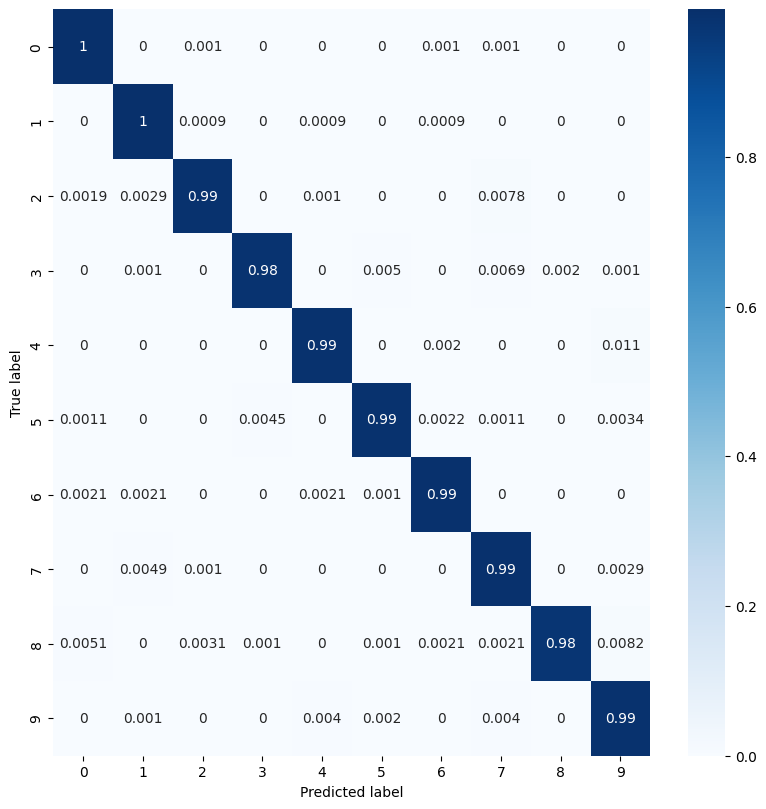

In [19]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=4)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
######################################
############# Cálculos usando a con_mat


In [29]:
# Matriz confuão sem normalização
print(con_mat)

[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1132    1    0    1    0    1    0    0    0]
 [   2    3 1018    0    1    0    0    8    0    0]
 [   0    1    0  994    0    5    0    7    2    1]
 [   0    0    0    0  969    0    2    0    0   11]
 [   1    0    0    4    0  881    2    1    0    3]
 [   2    2    0    0    2    1  951    0    0    0]
 [   0    5    1    0    0    0    0 1019    0    3]
 [   5    0    3    1    0    1    2    2  952    8]
 [   0    1    0    0    4    2    0    4    0  998]]


In [30]:
# Verdadeiro Positivo: são os termos da diagonal

VP_list = np.diag(con_mat)

In [34]:
# Falso Positivo: soma nas colunas, menos termo da diagonal
FP_list = np.sum(con_mat, axis=0) - VP_list

In [36]:
# Falso Negativo: soma das linhas, menos termo da diagonal
FN_list = np.sum(con_mat, axis=1) - VP_list

In [48]:
# Verdadeiro negativo: soma de todos os termos da matrix, menos a linha e a coluna para cada classe
VN_list = np.sum(con_mat) - FN_list - FP_list - VP_list

In [51]:
# Checando se os valores somam o total de amostras
l = len(test_images)
for i in classes:
    print(VP_list[i] + FP_list[i] + FN_list[i] + VN_list[i] == l)

True
True
True
True
True
True
True
True
True
True


In [53]:
#Sensibilidade VP/(VP + FN) para cada classe

Sens = VP_list/(VP_list+FN_list)
print(Sens)

[0.99693878 0.99735683 0.98643411 0.98415842 0.98676171 0.98766816
 0.99269311 0.99124514 0.97741273 0.98909812]


In [54]:
# Especificidade VN/(FP +VN) para cada classe
Espc = VN_list/(FP_list + VN_list)
print(Espc)

[0.99889135 0.99864636 0.99933095 0.99944383 0.99911289 0.99901186
 0.99911524 0.99743647 0.99977842 0.99710822]


In [55]:
# Acurácia (VP + VN)/N para cada classe

Acur = (VP_list + VN_list) / len(test_images)
print(Acur)

[0.9987 0.9985 0.998  0.9979 0.9979 0.998  0.9985 0.9968 0.9976 0.9963]


In [57]:
# Precisão VP / (VP + FP) para cada classe

Prec = VP_list/(VP_list + FP_list)
print(Prec)

[0.98986829 0.98951049 0.99414062 0.99499499 0.99181167 0.98988764
 0.99165798 0.97792706 0.99790356 0.97460938]


In [58]:
# F-score para 2*P*S/ (P+S) cada classe

Fscor = 2* Prec * Sens / (Prec + Sens)
print(Fscor)

[0.99339095 0.99341817 0.99027237 0.98954704 0.98928025 0.98877666
 0.99217527 0.98454106 0.98755187 0.9818003 ]
